# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                      "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | vao
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kloulklubed
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | alihe
Processing Record 10 of Set 1 | kasane
Processing Record 11 of Set 1 | port hedland
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | puteyets
Processing Record 16 of Set 1 | yerbogachen
Processing Record 17 of Set 1 | sabang
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | pathein
Processing Record 21 of Set 1 | shingu
Processing Record 22 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,-9.69,100,82,2.91,RU,1678633424
1,atuona,-9.8000,-139.0333,79.23,76,59,8.10,PF,1678633425
2,vao,-22.6667,167.4833,76.01,69,3,10.92,NC,1678633425
3,ushuaia,-54.8000,-68.3000,49.96,75,80,7.76,AR,1678633367
4,kloulklubed,7.0419,134.2556,79.30,79,67,11.23,PW,1678633425


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv(
"C:/Users/44739/Documents/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/44739/Documents/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,-9.69,100,82,2.91,RU,1678633424
1,atuona,-9.8000,-139.0333,79.23,76,59,8.10,PF,1678633425
2,vao,-22.6667,167.4833,76.01,69,3,10.92,NC,1678633425
3,ushuaia,-54.8000,-68.3000,49.96,75,80,7.76,AR,1678633367
4,kloulklubed,7.0419,134.2556,79.30,79,67,11.23,PW,1678633425


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

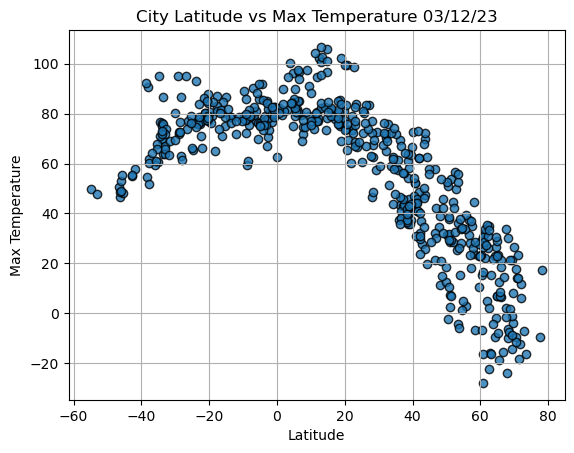

In [30]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"), fontsize=12)
plt.ylabel("Max Temperature", fontsize=10)
plt.xlabel("Latitude", fontsize=10)
plt.grid()

# Save the figure
plt.savefig("C:/Users/44739/Documents/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

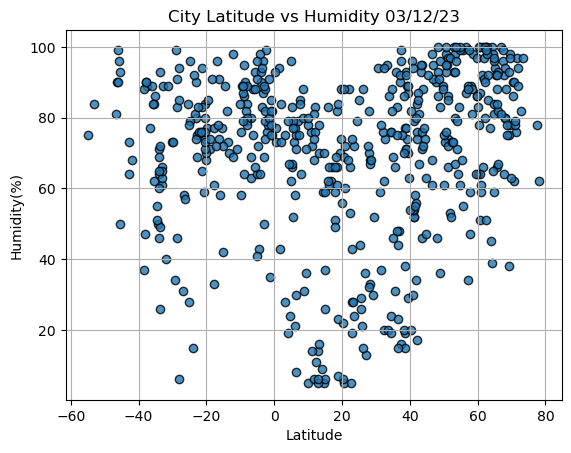

In [21]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/44739/Documents/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

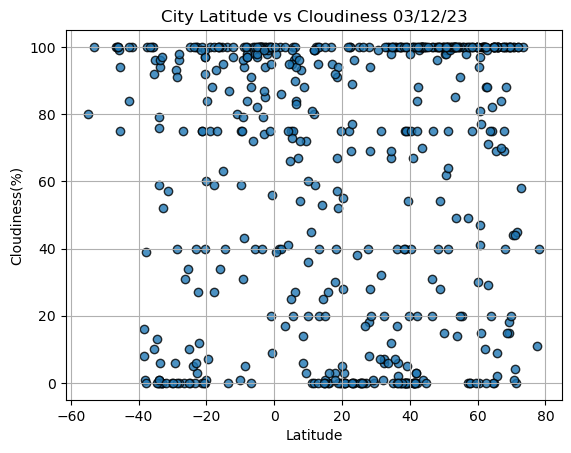

In [22]:
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]

plt.scatter(lat, cloud, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))
plt.grid(True)


# Save the figure
plt.savefig("C:/Users/44739/Documents/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

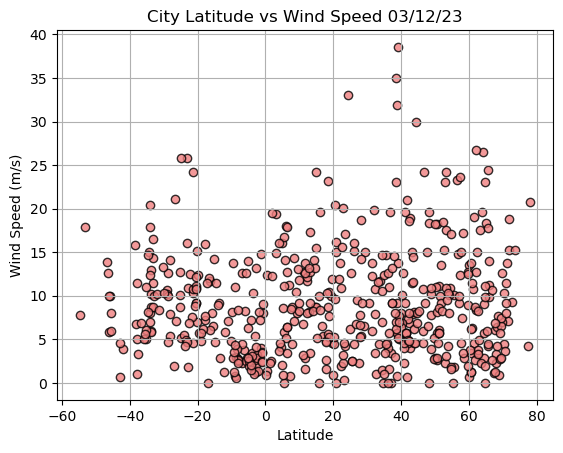

In [26]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

plt.scatter(lat, wind, marker="o", alpha=0.8, facecolor ="lightcoral", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/44739/Documents/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [150]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, y_label, textcoords):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.annotate(line_eq,textcoords,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()   
    print(f"The r value is: {rvalue}")
    print(line_eq)

In [151]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,-9.69,100,82,2.91,RU,1678633424
4,kloulklubed,7.0419,134.2556,79.30,79,67,11.23,PW,1678633425
5,albany,42.6001,-73.9662,36.81,67,99,4.00,US,1678633425
7,alihe,50.5667,123.7167,-2.29,98,62,2.59,CN,1678633425
12,clyde river,70.4692,-68.5914,-9.53,90,44,4.41,CA,1678633426


In [152]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atuona,-9.8000,-139.0333,79.23,76,59,8.10,PF,1678633425
2,vao,-22.6667,167.4833,76.01,69,3,10.92,NC,1678633425
3,ushuaia,-54.8000,-68.3000,49.96,75,80,7.76,AR,1678633367
6,rikitea,-23.1203,-134.9692,78.03,80,100,25.84,PF,1678633425
8,kasane,-17.8167,25.1500,87.04,33,27,7.18,BW,1678633425


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8917964321810372
y = -1.36 x + 100.85


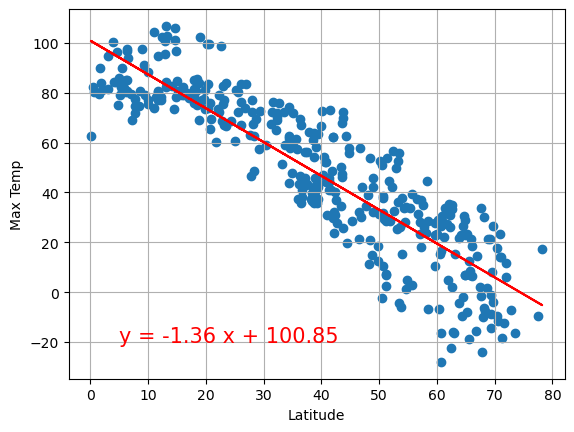

In [153]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression_plot(x_values, y_values, "Max Temp", (5, -20))


The r value is: 0.5812997587367348
y = 0.44 x + 83.75


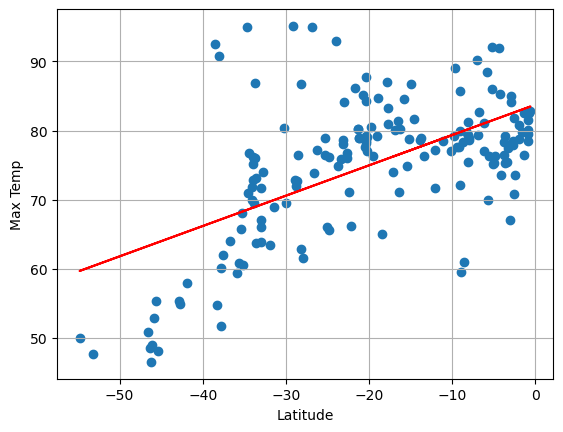

In [154]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression_plot(x_values, y_values, "Max Temp", (-35,12))


**Discussion about the linear relationship:** For the Northern Hemisphre, there is a strong negative correlation between Latitude and Maximum Temperature. The further away you move from the equator, the lower the temperature. For the Souhern Hemisphere, there is a positive correlation. As you get closer to the equator, the temperature increases. The temeperature at the equator is the highest temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.4093290207223279
y = 0.51 x + 48.62


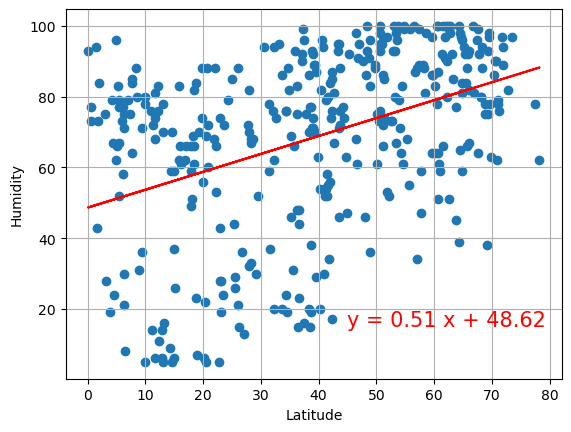

In [155]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression_plot(x_values, y_values, "Humidity", (45,15))

The r value is: 0.15290885056070852
y = 0.2 x + 78.25


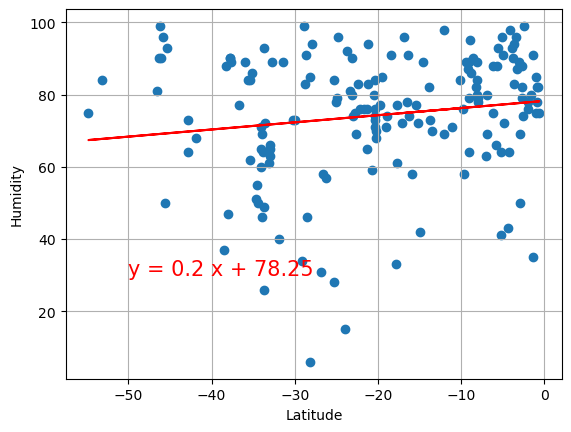

In [159]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression_plot(x_values, y_values, "Humidity", (-50,30))

**Discussion about the linear relationship:** The result reveal a moderate positive correlation between latitude and humidity in the Northern Hemisphere and a weak positive correlation between latitude and humidity in the Southern Hemisphere. This seems to show us that the higher the latitude, the higher the humidity. However, this does not show us a strong relationship between the two variables. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.17569021947780297
y = 0.35 x + 46.46


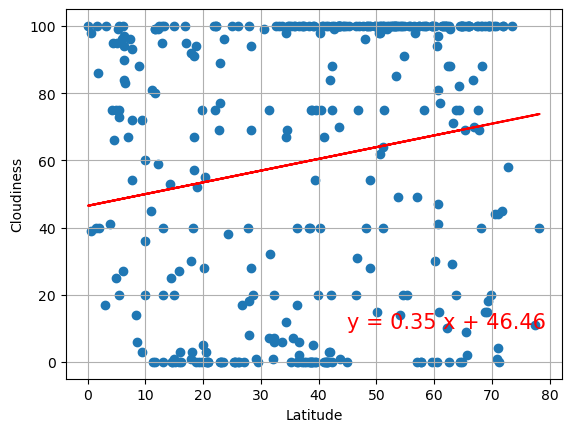

In [162]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression_plot(x_values, y_values, "Cloudiness", (45,10))

The r value is: 0.25221082115422
y = 0.74 x + 79.38


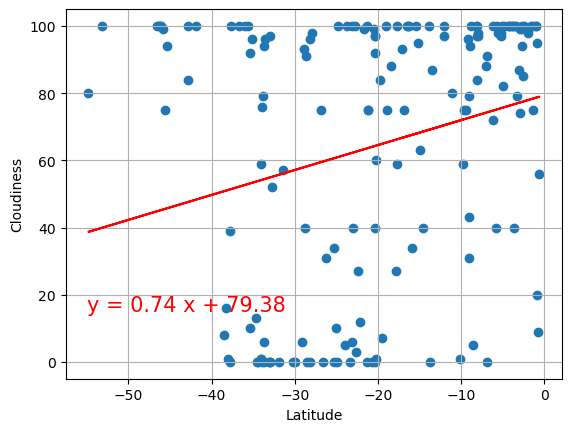

In [163]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression_plot(x_values, y_values, "Cloudiness", (-55,15))

**Discussion about the linear relationship:** The result reveal a weak positive correlation between latitude and cloudiness in the Northern Hemisphere and a moderate positive correlation between latitude and cloudiness in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.002793752293041459
y = 0.0 x + 9.22


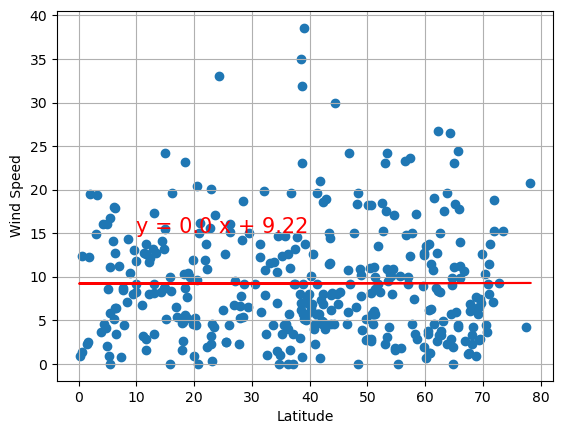

In [165]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression_plot(x_values, y_values, "Wind Speed", (10,15))

The r value is: -0.3555792968993135
y = -0.13 x + 5.2


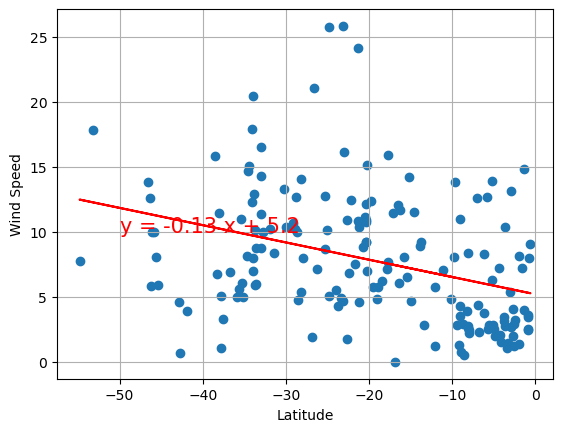

In [166]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression_plot(x_values, y_values, "Wind Speed", (-50,10))

**Discussion about the linear relationship:** The result reveal no correlation between latitude and wind speed in the Northern Hemisphere and weak negative correlation between latitude and wind speed in the Southern Hemisphere. 